# 1. Preparation

## 1.1. Import Modules

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Ignore light warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import OS 
import os
from os.path import join

## 1.2. Get Dataset: Wine Dataset

In [4]:
# Import Wine Dataset
from sklearn.datasets import load_wine

In [5]:
# Load Data on memory
wine = load_wine()

## 1.3. Check the Dataset

In [6]:
# Overview
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## 1.3. Make a DataFrame

In [7]:
# Get each items
data = wine.data
label = wine.target
columns = wine.feature_names

In [8]:
# Make a DataFrame
data = pd.DataFrame(data, columns = columns)

In [9]:
# Check the DataFrame
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# 2. Data Pre-Processing

## 2.1. Min-Max Scaling

In [10]:
# If a size of data is small and dimensions are high, its density is small -> Need of clustering

In [11]:
# Import module
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Load scaler on memory
scaler = MinMaxScaler()

# Fit Data
data = scaler.fit_transform(data)  # Result is in numpy.ndarray -> No 'head' 

# Check Data
data[:5] # Use data[:5] instead of 'data.head()'

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

## 2.2. PCA: Reduce Dimentions

In [13]:
# Import module

from sklearn.decomposition import PCA

In [14]:
# Load PCA on memory
pca = PCA(n_components = 2)  # 13-dimention -> 2-dimention

# Fit data
data = pca.fit_transform(data)

# Check data
data[:5]

array([[-0.70633576, -0.25319275],
       [-0.4849768 , -0.00882289],
       [-0.52117227, -0.18918722],
       [-0.82164366, -0.58090551],
       [-0.20254638, -0.05946657]])

In [15]:
# Check DataShape
data.shape

(178, 2)

# 3. K-Means Clustering

## 3.1. Preparation

In [16]:
# Import Module
from sklearn.cluster import KMeans

In [17]:
# Load K-Means on memory
kmeans = KMeans(n_clusters=3) # Number of clusters

## 3.2. K-Means Clustering

In [18]:
# Fit data: Data -> 3 clusters
kmeans.fit(data)

KMeans(n_clusters=3)

In [19]:
# Clustering
cluster = kmeans.predict(data)

# Check data
print(cluster) # Result will show labled data clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 0 2 2 2 2 0 2 0
 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 3.4. Visualization

Text(0.5, 1.0, 'Clustering')

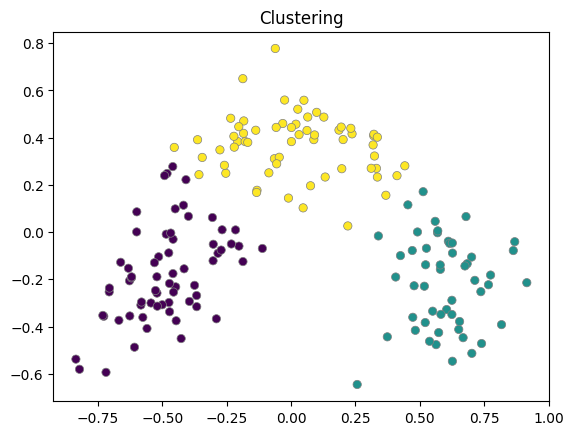

In [20]:
plt.scatter(data[:, 0],  # Bring all data, but 0 column
            data[:, 1],  # Bring all data, but 1st column
            c=cluster,   # Colors depending on clusters
            linewidth=0.5,
            edgecolor='grey')

plt.title('Clustering')

# 4. Hierachical Clustering

## 4.1. Preparation

In [21]:
# Import module
from scipy.cluster.hierarchy import single
from sklearn.cluster import AgglomerativeClustering

In [22]:
# Load clustering on memory
single_clustering = AgglomerativeClustering(linkage='single') 

## 4.2. Single Clustering

In [23]:
# Fit Data
single_clustering.fit(data)

# Single Clustering
single_cluster = single_clustering.labels_

# Check data
single_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## 4.3. Visualization

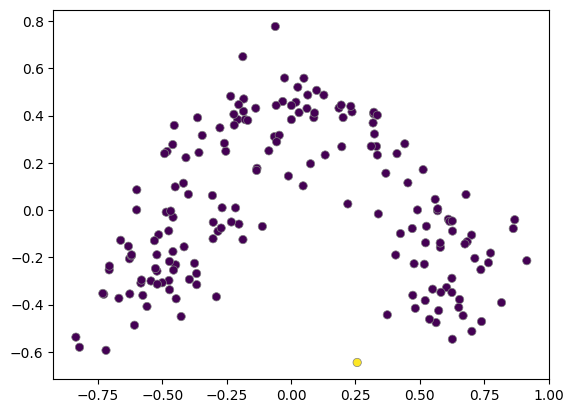

In [24]:
# Scatter Plot
plt.scatter(data[:, 0],
            data[:, 1],
            c=single_cluster,
            linewidth=0.5,
            edgecolor='grey')

## 4.4. Re-clustering

In [25]:
# Load clustering on memory
single_clustering = AgglomerativeClustering(n_clusters = 3,      # The data above only shows 0 and 1 
                                            linkage='single')    #   -> Need to be diversification

In [26]:
# Fit Data
single_clustering.fit(data)

# Single Clustering
single_cluster = single_clustering.labels_

# Check data
single_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

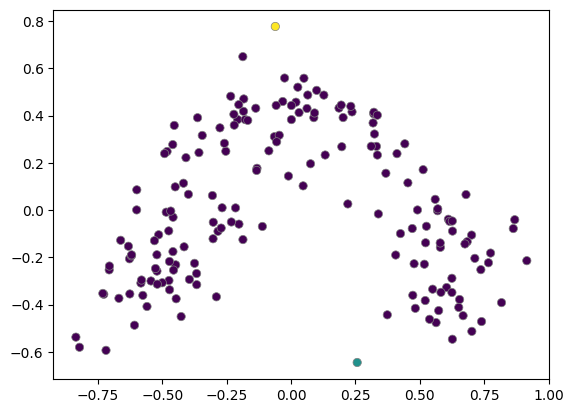

In [27]:
# Scatter Plot
plt.scatter(data[:, 0],
            data[:, 1],
            c=single_cluster,
            linewidth=0.5,
            edgecolor='grey')


# The result shows increasing a number of clusters is not a solution -> Try 'Complete Clustering'

## 4.5. Complete Clustering

In [28]:
# Load on memory
complete_clustering = AgglomerativeClustering(n_clusters=3,
                                              linkage='complete')  # Complete Clustering

# Fit Data
complete_clustering.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [29]:
# Labelling
complete_cluster = complete_clustering.labels_

# Check Data
complete_cluster

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

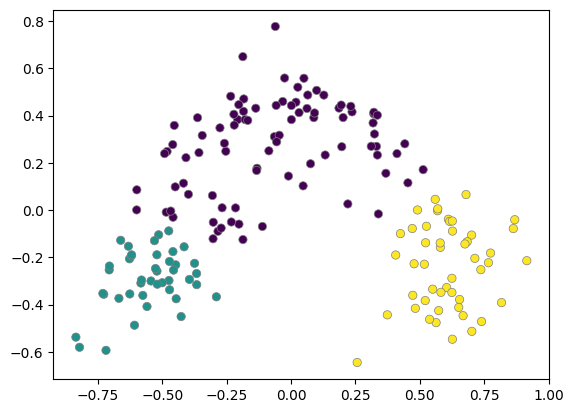

In [30]:
# Visualization
plt.scatter(data[:, 0],
            data[:, 1],
            c=complete_cluster,
            linewidth=0.5,
            edgecolor='grey')

# 5. Dendrogram

- Dendrogram
 - Find the best number of clusters based on a dendrogram

## 5.1. Preparation

In [31]:
# Import module
from scipy.cluster.hierarchy import dendrogram

## 5.2. Dendrogram

In [32]:
# Load Children nodes of Hierarchical Cluster on memory
children = complete_clustering.children_   # Names of Internal attributes:  *****_  

In [33]:
# Set the distance
distance = np.arange(children.shape[0])

In [34]:
# Calculate number of nodes in each steps of clustering
no_of_observations = np.arange(2,
                               children.shape[0]+2)  # Reason of '+2': 

In [35]:
# Make a matrix
linkage_matrix = np.column_stack([children,
                                  distance,
                                  no_of_observations]).astype(float)

## 5.3. Visualization

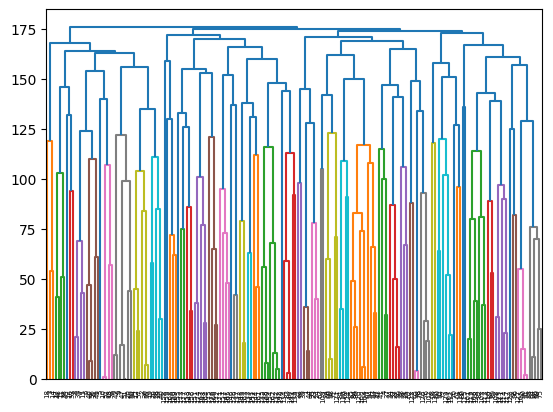

In [36]:
# Create a Dendrogram
dendrogram(linkage_matrix),
p = len(data),
labels = complete_cluster,
show_contracted = True,
no_labels=True

# 6. Silhouette Score

- Silhouette Score
  - Find the best number for the best cluster

## 6.1. Preparation

In [38]:
# Import module
from sklearn.metrics import silhouette_score

## 6.2. Silhouette Score

In [41]:
best_n = -1
best_score = -1

for n_cluster in range(2,11):
  kmeans = KMeans(n_clusters = n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)

  # Check Silhouette Score
  score = silhouette_score(data, cluster)

  print('Cluster count: {}, Silhouette Score: {:.2f}'.format(n_cluster, score))

  # Find the bes clustert score
  if score > best_score:
    best_n = n_cluster
    best_score = score

# Print the best score
print('\n-----------------------------------------------------------\n')
print('The Best Number of Cluster: {} \nSilhouette Score: {:.2f}'.format(best_n, best_score))

Cluster count: 2, Silhouette Score: 0.49
Cluster count: 3, Silhouette Score: 0.57
Cluster count: 4, Silhouette Score: 0.49
Cluster count: 5, Silhouette Score: 0.45
Cluster count: 6, Silhouette Score: 0.42
Cluster count: 7, Silhouette Score: 0.40
Cluster count: 8, Silhouette Score: 0.39
Cluster count: 9, Silhouette Score: 0.38
Cluster count: 10, Silhouette Score: 0.40

-----------------------------------------------------------

The Best Number of Cluster: 3 
Silhouette Score: 0.57
